## 实训一：简单的RNN网络

### 步骤 1: 导入必要的库

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim  #优化器如SGD，Adam、Adagrad（自适应梯度）等常用优化器

# 确保绘图在Jupyter notebook中可以显示
%matplotlib inline

### 步骤 2: 创建简单的序列数据

In [2]:
# 生成简单的正弦波数据，用于演示
t = np.linspace(0, 10, 100)  # 时间序列
data = np.sin(t)  # 正弦波数据
print(t)
print(data)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

### 步骤 3: 准备数据

In [3]:
# 数据预处理，转化为 PyTorch 张量
data = torch.tensor(data, dtype=torch.float32).view(-1, 1, 1)  # (序列长度, 批大小, 输入特征)

# 目标数据，向前移动一位
target = torch.roll(data, -1, dims=0)
target[-1] = 0  # 最后一项的目标值设为 0

### 步骤 4: 定义简单的RNN模型

In [4]:
# 定义一个简单的 RNN 模型
class SimpleRNN(nn.Module):
    def __init__(self,input_size=1,hidden_size=10,output_size=1):   # input_size 是输入数据的特征维度。hidden_size 是 RNN 隐藏层的维度。output_size 是模型输出的维度。
        super(SimpleRNN,self).__init__()
        #batch_first默认的False情况下，pytorch会假定数据的维度为（序列长度, 批处理大小, 特征维度）
        #batch_first默认的True情况下，表示的维度应该为（批处理大小，序列的长度，特征维度）
        #所以cnn是四个维度，rnn是三个维度，形状为(批量大小,序列长度,特征维度)
        self.rnn=nn.RNN(input_size,hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size,output_size)  # 全连接层
    def forward(self,x):
        h0=torch.zeros(1,x.size(0),self.rnn.hidden_size)  # 初始化隐藏状态，shape为(batch_size, hidden_size)。在 RNN 的前向传播过程中，隐藏状态是跨时间步传递的信息，它帮助网络捕捉序列数据中的时间依赖性。
        out,_=self.rnn(x,h0)  #输出分别为最后的状态，和中间的隐藏层
        out=self.fc(out)  
        # print(x.shape)
        # aa
        return out
# 实例化模型
model=SimpleRNN()
print(model)

SimpleRNN(
  (rnn): RNN(1, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)


### 步骤 5: 模型训练

In [5]:
# 定义损失函数和优化器
#定义交叉熵损失函数,常用于多分类问题
criterion=nn.MSELoss() 
#定义优化器
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs=200   
model.train()     #启动model的训练模式

for epoch in range(num_epochs):  #for循环来遍历每个训练周期
    outputs=model(data) #前向传播
    # print(outputs.shape)
    # p
    # 损失函数
    loss=criterion(outputs,target)  #用交叉熵损失来计算预测输出与真是标签之间的损失值

    # 反向传播：就是逆序执行的前向传播
    # 首先清零所有参数的梯度，其默认情况下梯度是累加的
    optimizer.zero_grad()   #必须要有
    loss.backward()  #开启反向传播，计算损失函数关于参数的梯度
    optimizer.step() #根据梯度来更新参数

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 0.4438
Epoch [20/200], Loss: 0.4155
Epoch [30/200], Loss: 0.3909
Epoch [40/200], Loss: 0.3690
Epoch [50/200], Loss: 0.3488
Epoch [60/200], Loss: 0.3293
Epoch [70/200], Loss: 0.3100
Epoch [80/200], Loss: 0.2906
Epoch [90/200], Loss: 0.2711
Epoch [100/200], Loss: 0.2514
Epoch [110/200], Loss: 0.2316
Epoch [120/200], Loss: 0.2117
Epoch [130/200], Loss: 0.1919
Epoch [140/200], Loss: 0.1722
Epoch [150/200], Loss: 0.1530
Epoch [160/200], Loss: 0.1344
Epoch [170/200], Loss: 0.1166
Epoch [180/200], Loss: 0.1000
Epoch [190/200], Loss: 0.0846
Epoch [200/200], Loss: 0.0706


### 步骤 6: 模型演示（前向传播）

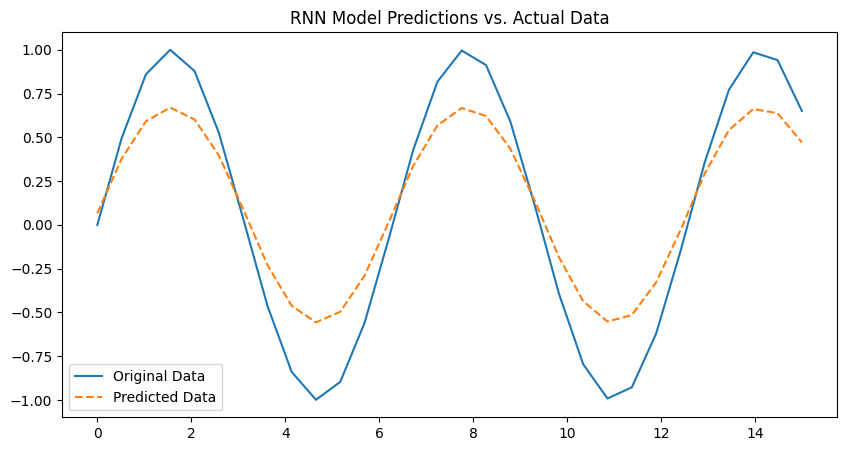

In [6]:
t = np.linspace(0, 15, 30)  # 时间序列
test_data = np.sin(t)  # 正弦波数据
test_data=torch.tensor(test_data, dtype=torch.float32).view(-1,1,1)#（序列长度，批大小，输入特征）

# 模型评估
model.eval()  #冻结模型，用于评估
with torch.no_grad():
    predicted=model(test_data)
# 可视化原始数据和模型预测
plt.figure(figsize=(10, 5))
plt.title('RNN Model Predictions vs. Actual Data')
plt.plot(t, test_data.numpy().flatten(), label='Original Data')
plt.plot(t, predicted.numpy().flatten(), label='Predicted Data', linestyle='dashed')
plt.legend()
plt.show()

## 实训二：LSTM网络的应用

### 步骤 1: 导入必要的库

In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 确保绘图在Jupyter notebook中可以显示
%matplotlib inline

### 步骤 2: 创建简单的序列数据

In [8]:
# 生成简单的正弦波数据，用于演示
t = np.linspace(0, 10, 100)  # 时间序列
data = np.sin(t)  # 正弦波数据

### 步骤 3: 准备数据

In [9]:
# 数据预处理，转化为 PyTorch 张量
data = torch.tensor(data, dtype=torch.float32).view(-1, 1, 1)  # (序列长度, 批大小, 输入特征)

# 目标数据，向前移动一位
target = torch.roll(data, -1, dims=0)
target[-1] = 0  # 最后一项的目标值设为 0

### 步骤 4: 定义LSTM模型

In [10]:
class LSTM_layer(nn.Module):
    def __init__(self,input_size=1,hidden_size=10,num_layers=2,output_size=1):   # input_size 是输入数据的特征维度（通道数）。hidden_size 是 RNN 隐藏层的维度。output_size 是模型输出的维度。
        super(LSTM_layer,self).__init__()
        #batch_first默认的False情况下，pytorch会假定数据的维度为（序列长度, 批处理大小, 特征维度）
        #batch_firstTrue情况下，表示的维度应该为（批处理大小，序列长度，特征维度）
        #所以cnn是四个维度，rnn是三个维度，形状为(批处理大小,序列长度,特征维度)，一般为True。#num_layers为循环的次数
        self.lstm=nn.LSTM(input_size,hidden_size,num_layers,batch_first=True)
        self.fc=nn.Linear(hidden_size,output_size)  # 全连接层
    def forward(self,x):
        # h0=torch.zeros(1,x.size(0),self.rnn.hidden_size)  # 初始化隐藏状态，shape为(batch_size, hidden_size)
        out,_=self.lstm(x)  #输出分别为最后的状态，和中间的隐藏层
        out=self.fc(out)  
        # print(x.shape)
        # aa
        return out
# 实例化模型
lstm_model=LSTM_layer()
print(lstm_model)

LSTM_layer(
  (lstm): LSTM(1, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)


### 步骤 5: 模型训练

In [11]:
# 定义损失函数和优化器
#定义交叉熵损失函数,常用于多分类问题
criterion=nn.MSELoss() 
#定义优化器
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

# 训练模型
num_epochs=200   
lstm_model.train()     #启动lstm_model的训练模式

for epoch in range(num_epochs):  #for循环来遍历每个训练周期
    outputs=lstm_model(data) #前向传播
    # print(outputs.shape)
    # p
    # 损失函数
    loss=criterion(outputs,target)  #用交叉熵损失来计算预测输出与真是标签之间的损失值

    # 反向传播：就是逆序执行的前向传播
    # 首先清零所有参数的梯度，其默认情况下梯度是累加的
    optimizer.zero_grad()   #必须要有
    loss.backward()  #开启反向传播，计算损失函数关于参数的梯度
    optimizer.step() #根据梯度来更新参数

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 0.4438
Epoch [20/200], Loss: 0.4390
Epoch [30/200], Loss: 0.4352
Epoch [40/200], Loss: 0.4316
Epoch [50/200], Loss: 0.4274
Epoch [60/200], Loss: 0.4220
Epoch [70/200], Loss: 0.4149
Epoch [80/200], Loss: 0.4055
Epoch [90/200], Loss: 0.3930
Epoch [100/200], Loss: 0.3766
Epoch [110/200], Loss: 0.3554
Epoch [120/200], Loss: 0.3286
Epoch [130/200], Loss: 0.2959
Epoch [140/200], Loss: 0.2574
Epoch [150/200], Loss: 0.2142
Epoch [160/200], Loss: 0.1683
Epoch [170/200], Loss: 0.1230
Epoch [180/200], Loss: 0.0822
Epoch [190/200], Loss: 0.0497
Epoch [200/200], Loss: 0.0276


### 步骤 6: 模型演示（前向传播）

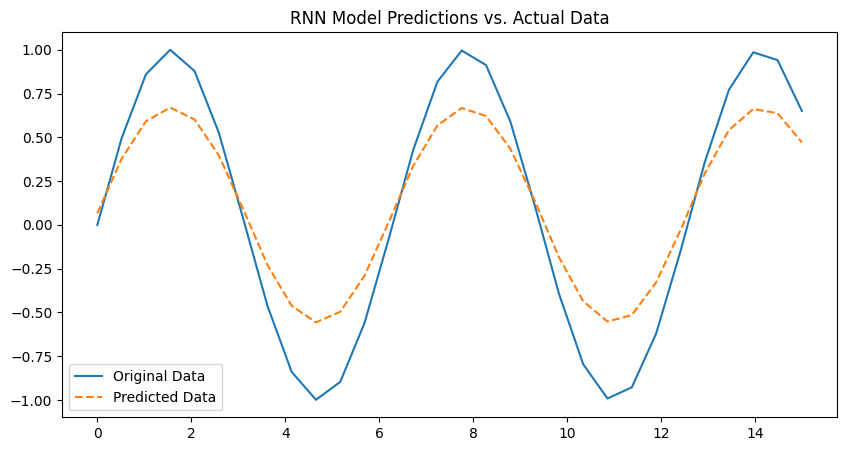

In [12]:
t = np.linspace(0, 15, 30)  # 时间序列
test_data = np.sin(t)  # 正弦波数据
test_data=torch.tensor(test_data, dtype=torch.float32).view(-1,1,1)#（序列长度，批大小，输入特征）

# 模型评估
model.eval()  #冻结模型，用于评估
with torch.no_grad():
    predicted=model(test_data)
# 可视化原始数据和模型预测
plt.figure(figsize=(10, 5))
plt.title('RNN Model Predictions vs. Actual Data')
plt.plot(t, test_data.numpy().flatten(), label='Original Data')
plt.plot(t, predicted.numpy().flatten(), label='Predicted Data', linestyle='dashed')
plt.legend()
plt.show()

## 作业：实现堆叠多层 LSTM 的效果

In [13]:
class LSTM_layer(nn.Module):
    def __init__(self,input_size=1,hidden_size=10,num_layers=2,output_size=1):   # input_size 是输入数据的特征维度（通道数）。hidden_size 是 RNN 隐藏层的维度。output_size 是模型输出的维度。
        super(LSTM_layer,self).__init__()
        #batch_first默认的False情况下，pytorch会假定数据的维度为（序列长度, 批处理大小, 特征维度）
        #batch_firstTrue情况下，表示的维度应该为（批处理大小，序列长度，特征维度）
        #所以cnn是四个维度，rnn是三个维度，形状为(批处理大小,序列长度,特征维度)，一般为True。#num_layers为循环的次数
        self.lstm=nn.LSTM(input_size,hidden_size,num_layers,batch_first=True)
        self.fc=nn.Linear(hidden_size,output_size)  # 全连接层
    def forward(self,x):
        out,_=self.lstm(x)  #输出分别为最后的状态，和中间的隐藏层
        out,_=self.lstm(x)
        out=self.fc(out)  
        # print(x.shape)
        # aa
        return out
# 实例化模型
lstm_model2=LSTM_layer()
print(lstm_model2)

LSTM_layer(
  (lstm): LSTM(1, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)


In [14]:
# 定义损失函数和优化器
#定义交叉熵损失函数,常用于多分类问题
criterion=nn.MSELoss() 
#定义优化器
optimizer = torch.optim.Adam(lstm_model2.parameters(), lr=0.001)

# 训练模型
num_epochs=200   
lstm_model2.train()     #启动lstm_model2的训练模式

for epoch in range(num_epochs):  #for循环来遍历每个训练周期
    outputs=lstm_model2(data) #前向传播
    # print(outputs.shape)
    # p
    # 损失函数
    loss=criterion(outputs,target)  #用交叉熵损失来计算预测输出与真是标签之间的损失值

    # 反向传播：就是逆序执行的前向传播
    # 首先清零所有参数的梯度，其默认情况下梯度是累加的
    optimizer.zero_grad()   #必须要有
    loss.backward()  #开启反向传播，计算损失函数关于参数的梯度
    optimizer.step() #根据梯度来更新参数

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 0.5032
Epoch [20/200], Loss: 0.4902
Epoch [30/200], Loss: 0.4783
Epoch [40/200], Loss: 0.4673
Epoch [50/200], Loss: 0.4568
Epoch [60/200], Loss: 0.4467
Epoch [70/200], Loss: 0.4367
Epoch [80/200], Loss: 0.4265
Epoch [90/200], Loss: 0.4159
Epoch [100/200], Loss: 0.4044
Epoch [110/200], Loss: 0.3912
Epoch [120/200], Loss: 0.3755
Epoch [130/200], Loss: 0.3564
Epoch [140/200], Loss: 0.3329
Epoch [150/200], Loss: 0.3043
Epoch [160/200], Loss: 0.2705
Epoch [170/200], Loss: 0.2318
Epoch [180/200], Loss: 0.1896
Epoch [190/200], Loss: 0.1465
Epoch [200/200], Loss: 0.1057


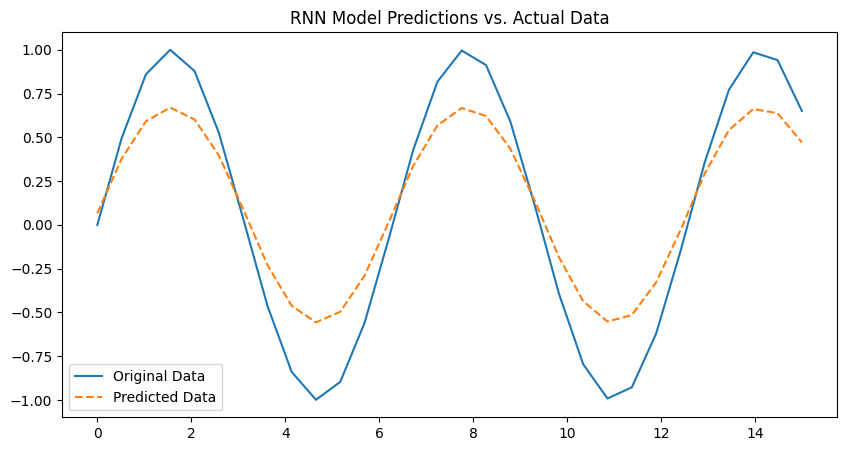

In [15]:
t = np.linspace(0, 15, 30)  # 时间序列
test_data = np.sin(t)  # 正弦波数据
test_data=torch.tensor(test_data, dtype=torch.float32).view(-1,1,1)#（序列长度，批大小，输入特征）

# 模型评估
model.eval()  #冻结模型，用于评估
with torch.no_grad():
    predicted=model(test_data)
# 可视化原始数据和模型预测
plt.figure(figsize=(10, 5))
plt.title('RNN Model Predictions vs. Actual Data')
plt.plot(t, test_data.numpy().flatten(), label='Original Data')
plt.plot(t, predicted.numpy().flatten(), label='Predicted Data', linestyle='dashed')
plt.legend()
plt.show()